## Проектная работа. Основы машинного обучения. Сеть фитнес-центров «Культурист-датасаентист»
Предметом исследования является сеть фитнес-центров "Культурист-датасаентист". Данная сеть разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. 

### Цель исследования 
Целью данного проекта является анализ анкет клиентов и разработка стратегии взаимодействия с ними на основе аналитических данных с целью уменьшения оттока.

### Ход исследования
«Культурист-датасаентист» предоставил сведения в csv-файлах - gym_churn.csv, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. О качестве данных нет никакой информации. Поэтому прежде чем приступить к анализу, понадобиться обзор данных, чтобы полученные в конечном итоге результаты были достоверны

Поэтому мое исследование будет иметь следующий порядок действий:
1. Загрузка и подготовка данных, включая обработку пропусков и аномалий.
2. Исследовательский анализ данных (EDA) для выявления основных трендов и закономерностей.
3. Построение модели прогнозирования оттока с оценкой её качества.
4. Кластеризация клиентов для выделения основных групп и оценки их поведения.
5. Формулирование общих выводов и базовых рекомендаций для удержания клиентов.

Для начала импортируем библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import warnings
warnings.simplefilter('ignore')

## Шаг 1. Загрузите данные

In [2]:
try: 
    data = pd.read_csv('gym_churn.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/gym_churn.csv')

Посмотрим, что все загружено успешно:

In [3]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Посмотрим сколько строк и столбцов содержит датафрейм:

In [4]:
data.shape

(4000, 14)

Проверим датафрейм на пропуски и на соответствие типов:

In [5]:
display(pd.DataFrame(data.isna().sum()).sort_values(by = 0).style.background_gradient('coolwarm'))

,0
gender,0
Near_Location,0
Partner,0
Promo_friends,0
Phone,0
Contract_period,0
Group_visits,0
Age,0
Avg_additional_charges_total,0
Month_to_end_contract,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Данные в столбцах двух типов: float и int. Пропусков в таблице нет.

Проверим колонку Month_to_end_contract на значения типа float

In [7]:
data['Month_to_end_contract'].unique()

array([ 5., 12.,  1.,  6.,  3., 10., 11.,  9.,  4.,  7.,  8.,  2.])

Как можно увидеть, значения здесь целочисленные. Можно перевести колонку к типу int

In [8]:
data['Month_to_end_contract'] = pd.to_numeric(data['Month_to_end_contract'], downcast='integer')

In [9]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   int8   
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Изменение типа колонки прошло успешно!

Проверим датафрейм на количество дубликатов

In [11]:
print('Количество явных дубликатов:',data.duplicated().sum())

Количество явных дубликатов: 0


Дубликаты отсутствуют

Также для последующего удобства приведем названия колонок к нижнему регистру:

In [12]:
data.columns = data.columns.str.lower()
data.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0


Посмотрим на статистические характеристики данных:

In [13]:
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Исходя из предоставленных данных, среднестатистический клиент наших фитнес-центров:
- Возраст - 29 лет
- Проживает или работает поблизости от центра
- Оставил свой контактный номер телефона
- Посещает фитнес-центр уже 4 месяца
- В среднем посещает центр 2 раза в неделю
- Потратил 147 денежных единиц на дополнительные услуги
- Имеет действующий абонемент на 5 месяцев, при этом осталось 4 месяца до его окончания
- Скорее всего пришёл без использования акции "приведи друга"

Отличия медианного клиента от среднестатистического:
- Абонемент (действующий) рассчитан на 1 месяц, а не на 5 ('Contract_period') и заканчивается через 1 месяц, а не через 4 ('Month_to_end_contract')
- Посещает центр в течение 3 месяцев
- Потратил меньше на дополнительные услуги - 136 денежных единиц

Большинство признаков представлено в виде бинарных значений (0 или 1), где 1 обозначает наличие признака, а 0 - отсутствие. При этом признаки 'gender' и 'Partner' имеют равное распределение между мужчинами и женщинами, а также между клиентами, пришедшими от партнерских компаний и неот партнерских. Также обращает внимание, что целевая переменная 'Churn' также представлена в виде бинарного значения, указывающего на отток клиента.

Остальные признаки представлены в числовом формате и охватывают более широкий диапазон значений, что позволяет отнести их к количественным данным. Однако, стоит отметить, что признак 'Contract_period', имеющий всего три возможных значения, также можно рассматривать как категориальный.

In [14]:
data['contract_period'].unique()

array([ 6, 12,  1])

Для удобства анализа определим списки категориальных и количественных признаков.

In [15]:
cat_prizn = ['gender', 'near_location', 'partner', 'promo_friends', 'phone'
                       , 'contract_period', 'group_visits']
num_prizn = ['age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime'
                      , 'avg_class_frequency_total', 'avg_class_frequency_current_month']

In [16]:
cat_prizn

['gender',
 'near_location',
 'partner',
 'promo_friends',
 'phone',
 'contract_period',
 'group_visits']

In [17]:
num_prizn

['age',
 'avg_additional_charges_total',
 'month_to_end_contract',
 'lifetime',
 'avg_class_frequency_total',
 'avg_class_frequency_current_month']

### Промежуточные выводы по шагу 1
1. Были выгружены данные, которые предоставила сеть фитнес-центров
2. Данные исследованы на пропуски и дубликаты. Их выявить не удалось
3. После ознакомления с колонкой month_to_end_contract было принято решение привести колонку к типу int
4. Для удобства использования все названия колонок приведены к нижнему регистру
5. После ознакомления со статистическими характеристиками данных был получен портрет среднестатистического клиента центра:
- Возраст - 29 лет
- Проживает или работает поблизости от центра
- Оставил свой контактный номер телефона
- Посещает фитнес-центр уже 4 месяца
- В среднем посещает центр 2 раза в неделю
- Потратил 147 денежных единиц на дополнительные услуги
- Имеет действующий абонемент на 5 месяцев, при этом осталось 4 месяца до его окончания
- Скорее всего пришёл без использования акции "приведи друга"
6. Составлены списки категориальных и количественных признаков.

## Шаг 2. Проведите исследовательский анализ данных (EDA)

Посмотрите на датасет: есть ли в нём отсутствующие значения (пропуски), изучите средние значения и стандартные отклонения (пригодится метод describe());

###### Было сделано выше

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());

In [18]:
display('Отток:')
display(data[data['churn']==1].describe().T)
display('\nОставшиеся клиенты:')
display(data[data['churn']==0].describe().T)

'Отток:'

,count,mean,std,min,25%,50%,75%,max
gender,1061.0,0.510839,0.500118,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,1061.0,0.768143,0.422217,0.000000,1.000000,1.000000,1.000000,1.000000
partner,1061.0,0.355325,0.478837,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,1061.0,0.183789,0.387495,0.000000,0.000000,0.000000,0.000000,1.000000
phone,1061.0,0.902922,0.296204,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,1061.0,1.728558,2.132371,1.000000,1.000000,1.000000,1.000000,12.000000
group_visits,1061.0,0.268615,0.443448,0.000000,0.000000,0.000000,1.000000,1.000000
age,1061.0,26.989632,2.895163,18.000000,25.000000,27.000000,29.000000,38.000000
avg_additional_charges_total,1061.0,115.082899,77.696419,0.148205,50.629127,103.814686,165.616858,425.535220
month_to_end_contract,1061.0,1.662582,1.964593,1.000000,1.000000,1.000000,1.000000,12.000000


'\nОставшиеся клиенты:'

,count,mean,std,min,25%,50%,75%,max
gender,2939.0,0.510037,0.499984,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,2939.0,0.873086,0.332933,0.000000,1.000000,1.000000,1.000000,1.000000
partner,2939.0,0.534195,0.498914,0.000000,0.000000,1.000000,1.000000,1.000000
promo_friends,2939.0,0.353522,0.478144,0.000000,0.000000,0.000000,1.000000,1.000000
phone,2939.0,0.903709,0.295040,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,2939.0,5.747193,4.716942,1.000000,1.000000,6.000000,12.000000,12.000000
group_visits,2939.0,0.464103,0.498795,0.000000,0.000000,0.000000,1.000000,1.000000
age,2939.0,29.976523,3.009933,19.000000,28.000000,30.000000,32.000000,41.000000
avg_additional_charges_total,2939.0,158.445715,99.801599,0.171862,76.920993,149.881171,224.448274,552.590740
month_to_end_contract,2939.0,5.283089,4.363522,1.000000,1.000000,6.000000,10.000000,12.000000


- Распределение пола среди клиентов не различается.
- Клиенты, проживающие или работающие поблизости от фитнес-центра, реже уходят в отток, что логично.
- Сотрудники компаний-партнеров реже попадают в отток, чем остальные клиенты.
- Клиенты, пришедшие по акции "Приведи друга", в два раза реже перестают посещать фитнес-клуб.
- Наличие мобильного номера клиента не отличается между группами.
- Средняя продолжительность договора выше у оставшихся пользователей, чем у тех, кто ушел в отток. В отток чаще попадают клиенты с договором на один месяц, что, вероятно, свидетельствует о том, что они заключают его чаще всего на короткий срок.
- Оставшиеся пользователи чаще посещают групповые занятия, хотя возможно, что те, кто ушел в отток, просто еще не успели начать их посещать.
- Средний возраст клиентов в разных группах отличается.
- Есть небольшое различие в выручке от дополнительных услуг фитнес-центра между группами.
- Оставшееся время до окончания срока действия договора выше у оставшихся клиентов.
- Клиенты, попавшие в отток, посещают фитнес-центр в среднем реже за все время.
- Количество посещений в предыдущем месяце в два раза ниже у клиентов, попавших в отток.

Построим столбчатые гистограммы и распределения признаков для тех, кто ушел и тех, кто остался.

Для построения графиков нам пригодится функция, которая будет строить столбиковую диаграмму:

In [19]:
def barplot(data, x, y, title, xlabel, ylabel, legend, color):
    data.plot(x, y, kind='bar', figsize=(8, 5), alpha=.7, legend=legend, color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel) 
    plt.show()

Для начала рассмотрим категориальные переменные:

Также напишем функцию, которая будет выводить:

- Сводную таблицу с общим количеством клиентов, количеством ушедших клиентов и долей оттока в зависимости от изучаемого признака;
- Диаграмму с общим количеством клиентов и количеством ушедших клиентов в зависимости от изучаемого признака (так мы сможем визуально оценить распределение всех клиентов и ушедших клиентов);
- Диаграмму с долей ушедших клиентов в зависимости от изучаемого признака (так мы визуально оценим, как признак влияет на отток).

In [20]:
def analyse_categorical(feature):
    temp = data.groupby(feature).agg({'churn': ['count', 'sum']}).reset_index()
    temp.columns = [feature, 'total_clients', 'churn_clients']
    temp['churn_rate'] = round(temp['churn_clients'] / temp['total_clients'], 2)
    print(temp)
    title = f"Общее количество клиентов и количество ушедших клиентов \n в зависимости от признака '{feature}'"
    xlabel = 'Значение признака'
    ylabel = 'Количество клиентов'
    barplot(temp, feature, ['total_clients', 'churn_clients'], title, xlabel, ylabel, True, None)
    title = f"Доля ушедших клиентов в зависимости от признака '{feature}'"
    ylabel = 'Доля ушедших клиентов'
    barplot(temp, feature, 'churn_rate', title, xlabel, ylabel, True, 'tomato')

Воспользуемся функцией. Начнём с признака 'gender' - пол:

   gender  total_clients  churn_clients  churn_rate
0       0           1959            519        0.26
1       1           2041            542        0.27


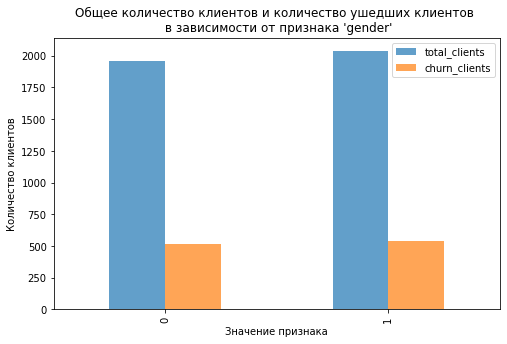

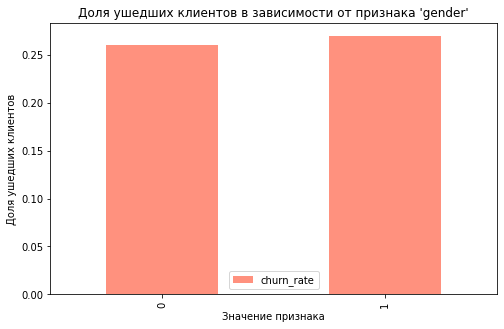

In [21]:
analyse_categorical('gender')

Доля мужчин и женщин среди ушедших клиентов примерно одинакова. Это свидетельствует о том, что пол не оказывает значительного влияния на решение клиентов об уходе. Следовательно, признак пола не имеет существенного значения для прогнозирования оттока и может быть исключен из рассмотрения при построении моделей.

Признак 'near_location' - проживание или работа в районе, где находится фитнес-центр:

   near_location  total_clients  churn_clients  churn_rate
0              0            619            246        0.40
1              1           3381            815        0.24


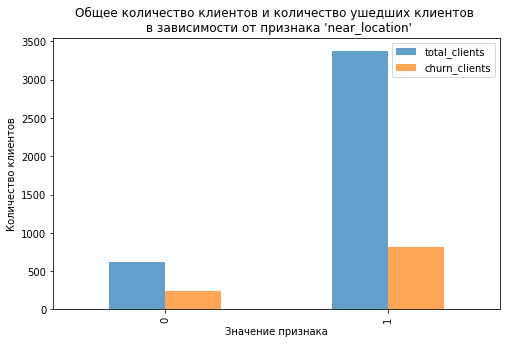

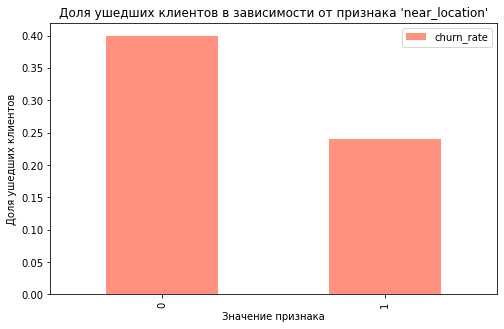

In [22]:
analyse_categorical('near_location')

Клиенты, проживающие или работающие в районе, где расположен фитнес-центр, составляют примерно 80% от общего числа клиентов. Однако доля ушедших клиентов среди них почти в два раза ниже, чем у остальных. Это указывает на то, что клиенты, проживающие поблизости от центра, более лояльны и стабильны. Следовательно, привлечение таких клиентов может быть эффективной стратегией для уменьшения оттока.

Признак 'partner' - сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент - в таком случае фитнес-центр хранит информацию о работодателе клиента):

   partner  total_clients  churn_clients  churn_rate
0        0           2053            684        0.33
1        1           1947            377        0.19


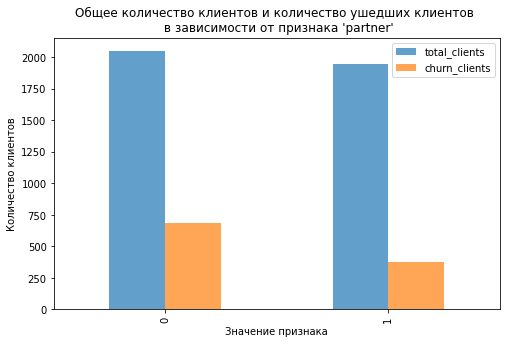

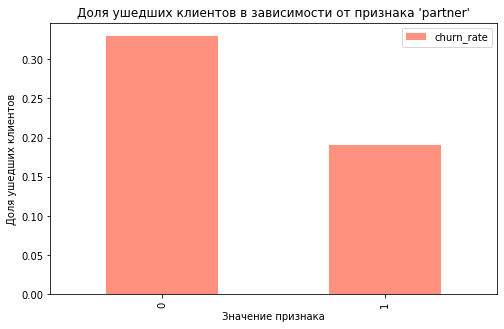

In [23]:
analyse_categorical('partner')

Количество клиентов, пришедших от компаний-партнёров, и остальных клиентов примерно одинаковое. Однако, доля ушедших среди клиентов от партнёров значительно ниже. Это свидетельствует о том, что сотрудничество с компаниями-партнёрами может быть ключом к более низкой оттока клиентов. Следовательно, стоит активнее привлекать таких клиентов и усиливать сотрудничество с партнёрами для расширения их сети.

Признак 'promo_friends' - факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента):

   promo_friends  total_clients  churn_clients  churn_rate
0              0           2766            866        0.31
1              1           1234            195        0.16


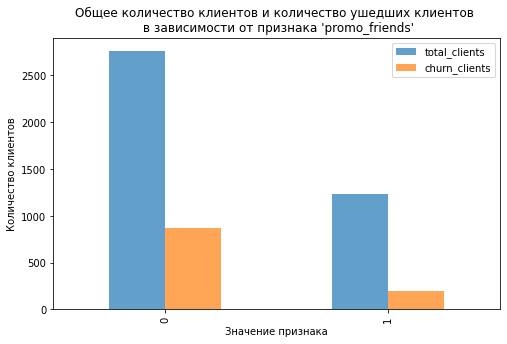

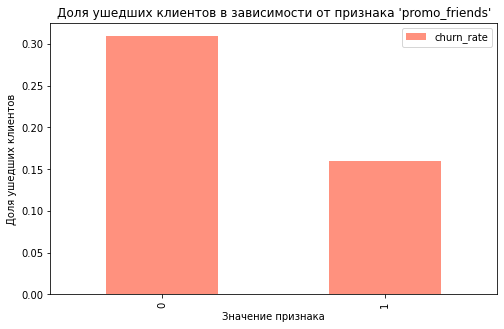

In [24]:
analyse_categorical('promo_friends')

Примерно треть клиентов пришла в рамках акции «приведи друга». Доля ушедших среди таких клиентов в 2 раза ниже, чем доля ушедших среди остальных клиентов. Акция работает: мы собрали не просто клиентов, но ещё и лояльных.

Признак 'phone' - наличие контактного телефона:

   phone  total_clients  churn_clients  churn_rate
0      0            386            103        0.27
1      1           3614            958        0.27


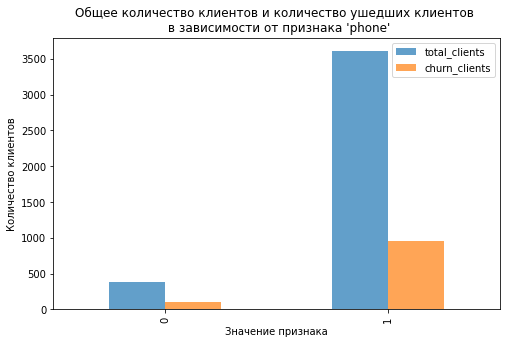

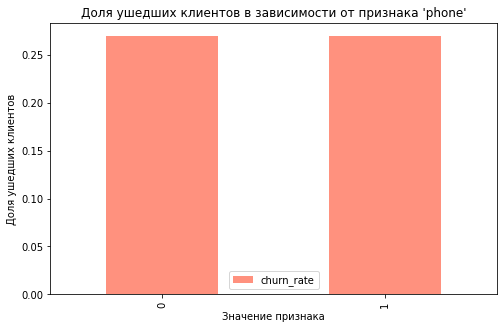

In [25]:
analyse_categorical('phone')

Клиентов, чьи телефоны у нас есть, почти в 10 раз больше, чем остальных. Однако этот признак не влияет на факт ухода клиента. Поэтому его можно не использовать при обучении моделей.

Признак 'contract_period' - длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год):

   contract_period  total_clients  churn_clients  churn_rate
0                1           2207            934        0.42
1                6            833            104        0.12
2               12            960             23        0.02


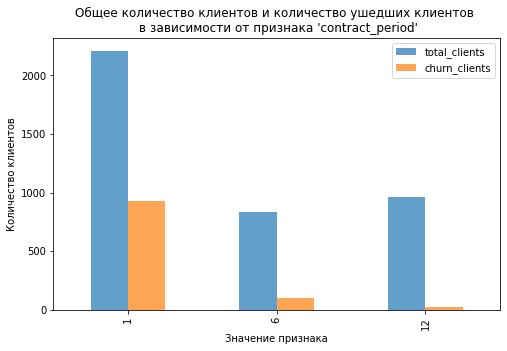

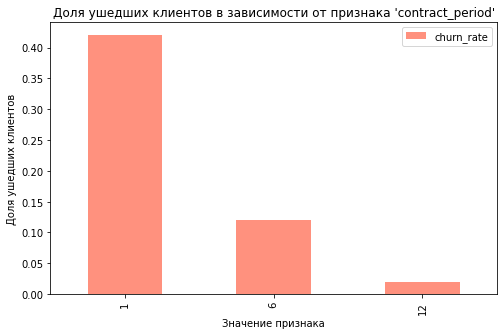

In [26]:
analyse_categorical('contract_period')

У более чем половины клиентов длительность текущего абонемента составляет всего 1 месяц. Среди таких клиентов доля ушедших наивысшая - 42%. В отличие от этого, клиенты с абонементом на 12 месяцев практически не попадают в отток. Это может говорить о том, что клиенты с долгосрочными абонементами более преданы занятиям в фитнес-центре. Возможно, их привязка к центру обусловлена оплатой за длительный срок, что стимулирует их оставаться. Таким образом, стимулирование продажи "долгосрочных" абонементов может быть эффективной стратегией для снижения оттока.

Признак 'group_visits' - факт посещения групповых занятий:

   group_visits  total_clients  churn_clients  churn_rate
0             0           2351            776        0.33
1             1           1649            285        0.17


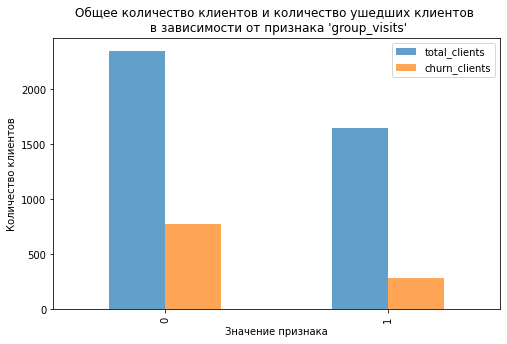

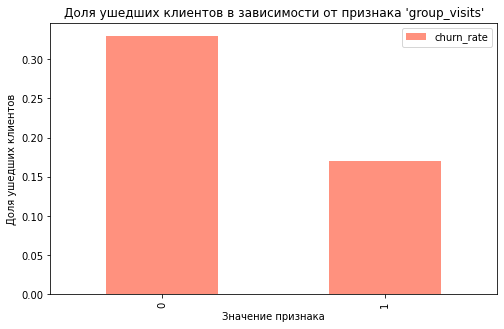

In [27]:
analyse_categorical('group_visits')

Доля клиентов, посещающих групповые занятия, немного меньше, чем участников индивидуальных занятий. Однако доля оттока среди посетителей групповых занятий примерно в два раза ниже. Это может говорить о том, что групповые занятия способствуют повышению лояльности клиентов. Возможно, они чувствуют большую привязанность к клубу и группе единомышленников. Если это действительно так, то активное приглашение клиентов на групповые занятия может помочь удержать и привлечь новых клиентов.

Теперь перейдем к количественным признакам

Их распределение лучше оценивать с помощью гистограмм и диаграмм размахов, поэтому напишем функции, которые их будут строить:

In [28]:
def histplot(feature, title, xlabel, ylabel, bins):
    plt.figure(figsize=(7, 5))
    plt.hist(data[feature], bins, label='total_clients')
    plt.hist(data.query('churn == 1')[feature], bins, label='churn_clients')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel) 
    plt.legend()
    plt.show()

In [29]:
def boxplot(feature, title, ylabel):
    plt.figure(figsize=(7, 5))
    plt.boxplot([data[feature], data.query('churn == 1')[feature]])
    plt.title(title)
    plt.ylabel(ylabel) 
    plt.xticks([1, 2], ['total_clients', 'churn_clients'])
    plt.show()

Также напишем функцию, которая будет выводить:

1. Гистограмму распределения всех клиентов и ушедших клиентов в зависимости от значения признака (так мы сможем увидеть, смещена ли гистограмма ушедших клиенты относительно гистограммы всех клиентов, то есть существует ли влияние признака на целевую переменную);
2. Диаграмму размаха для всех клиентов и ушедших клиентов в зависимости от значения признака (увидим, насколько "ящики с усами" смещены друг относительно друга, то есть оценим влияние признака на целевую переменную немного под другим углом);
3. Средние и медианы признака для всех клиентов и ушедших клиентов (сравним их).

In [30]:
def analyse_numerical(feature, bins):
    title = f"Распределение всех клиентов и ушедших клиентов \n в зависимости от признака '{feature}'"
    xlabel = 'Значение признака'
    ylabel = 'Количество клиентов'
    histplot(feature=feature, title=title, xlabel=xlabel, ylabel=ylabel, bins=bins)
    boxplot(feature, title, ylabel=xlabel)
    print(f'Среднее и медиана признака для всех клиентов: {round(data[feature].mean(), 1)},\
{round(data[feature].median(), 1)}')
    print(f'Среднее и медиана признака для ушедших клиентов: {round(data.query("churn == 1")[feature].mean(), 1)},\
{round(data.query("churn == 1")[feature].median(), 1)}')

Признак 'аge' - возраст:

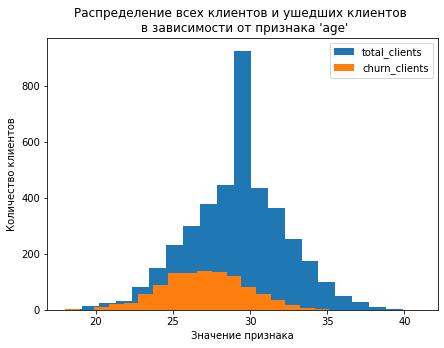

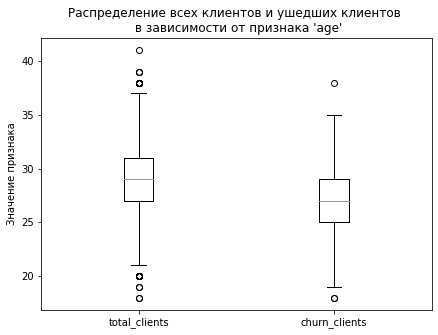

Среднее и медиана признака для всех клиентов: 29.2,29.0
Среднее и медиана признака для ушедших клиентов: 27.0,27.0


In [31]:
analyse_numerical('age', 21)

Гистограмма и ящик с ушедшими клиентами показывают, что среди них преобладает более молодая аудитория. Клиенты старше 35 лет практически не попадают в категорию оттока. Возможно, стоит уделить больше внимания привлечению и удержанию клиентов старшего возраста.

Признак 'avg_additional_charges_total' - суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон

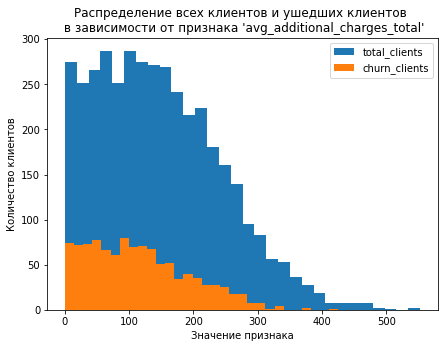

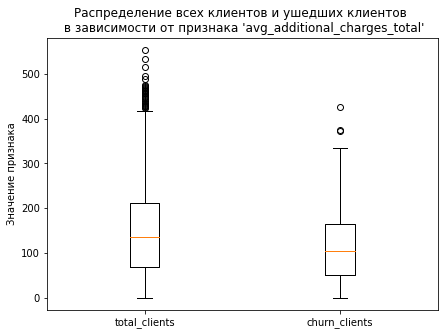

Среднее и медиана признака для всех клиентов: 146.9,136.2
Среднее и медиана признака для ушедших клиентов: 115.1,103.8


In [32]:
analyse_numerical('avg_additional_charges_total', 30)

Обе гистограммы и ящики ушедших и оставшихся клиентов имеют схожие формы. Однако, заметно, что клиенты, покинувшие фитнес-центр, в среднем тратили меньше на дополнительные услуги. Те, кто значительно больше тратил (более 400), остаются с нами.

Признак 'month_to_end_contract' - срок до окончания текущего действующего абонемента (в месяцах):

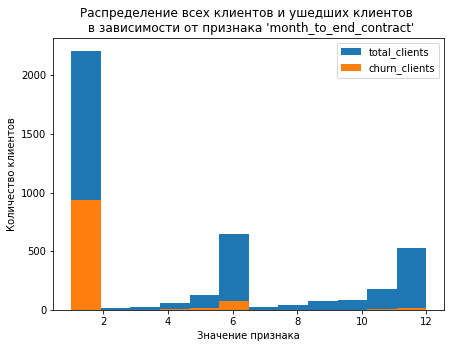

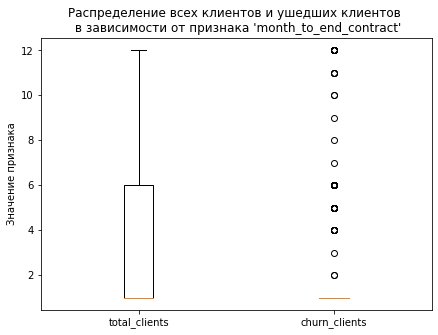

Среднее и медиана признака для всех клиентов: 4.3,1.0
Среднее и медиана признака для ушедших клиентов: 1.7,1.0


In [33]:
analyse_numerical('month_to_end_contract', 12)

Большинство клиентов имеют абонементы, которые скоро истекут, особенно часто это происходит через месяц. Однако отток среди таких клиентов является очень высоким. Для предотвращения оттока стоит предлагать клиентам продление абонемента заранее, возможно, с предоставлением скидки или другими привилегиями.

Признак 'lifetime' — время с момента первого обращения в фитнес-центр (в месяцах):

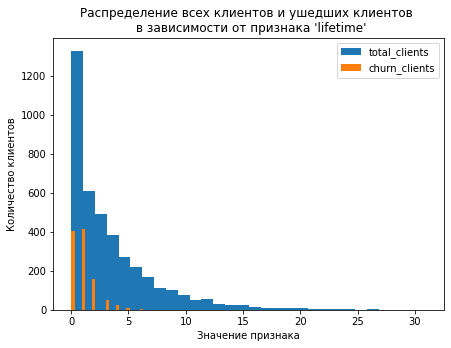

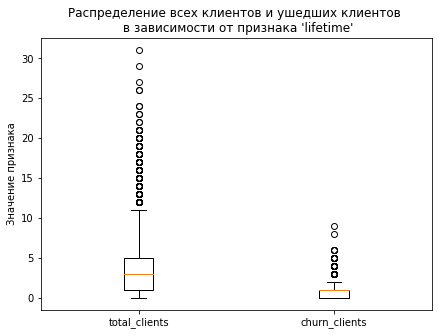

Среднее и медиана признака для всех клиентов: 3.7,3.0
Среднее и медиана признака для ушедших клиентов: 1.0,1.0


In [34]:
analyse_numerical('lifetime', 30)

Клиенты, которые начали посещать наш центр более 10 месяцев назад, не показывают признаков оттока. Это хороший знак и свидетельствует о стабильности таких клиентов. Также заметно, что вероятность оттока снижается с увеличением продолжительности посещений: особенно резкое снижение заметно после первого месяца. Поэтому важно предоставлять клиентам качественное обслуживание и мотивировать их оставаться в первые месяцы.

Признак 'аvg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента:

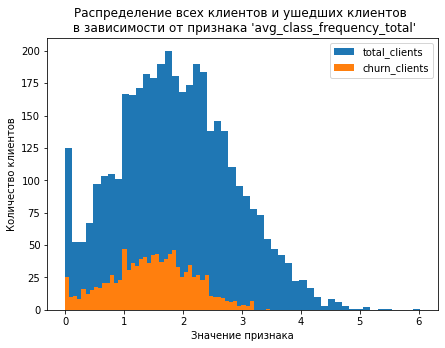

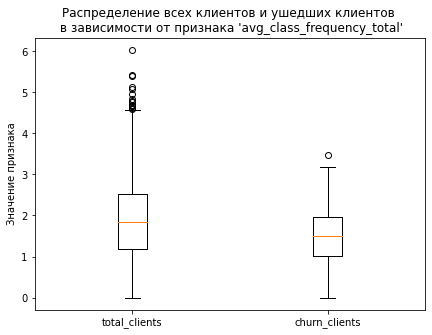

Среднее и медиана признака для всех клиентов: 1.9,1.8
Среднее и медиана признака для ушедших клиентов: 1.5,1.5


In [35]:
analyse_numerical('avg_class_frequency_total', 50)

Среди ушедших клиентов средняя частота посещений была немного ниже, чем у тех, кто остался. Клиенты, посещающие фитнес-центр 4 раза и более в неделю, скорее всего, останутся с нами и не уйдут.

Признак 'avg_class_frequency_current_month' - средняя частота посещений в неделю за предыдущий месяц:

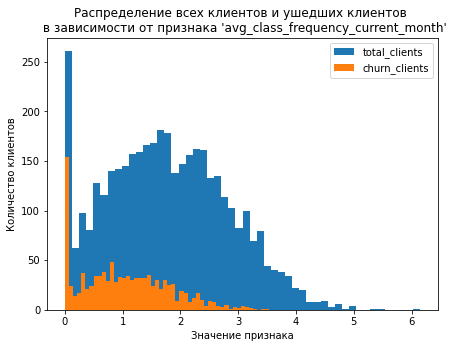

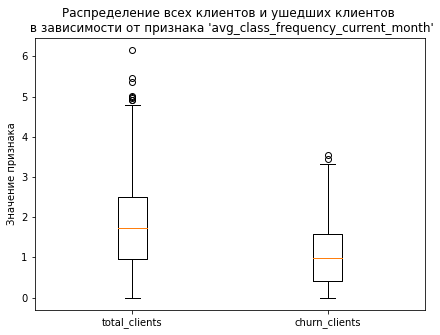

Среднее и медиана признака для всех клиентов: 1.8,1.7
Среднее и медиана признака для ушедших клиентов: 1.0,1.0


In [36]:
analyse_numerical('avg_class_frequency_current_month', 50)

Если ушедшие клиенты в среднем посещали зал 1,5 раза в неделю за весь период действия абонемента, то в последний месяц этот показатель у них снизился до 1 раза в неделю. Уменьшение частоты посещений является предвестником возможного оттока клиента. Рекомендуется рассмотреть возможность предложения клиенту скидки или бесплатного группового занятия.

Постройте матрицу корреляций и отобразите её.

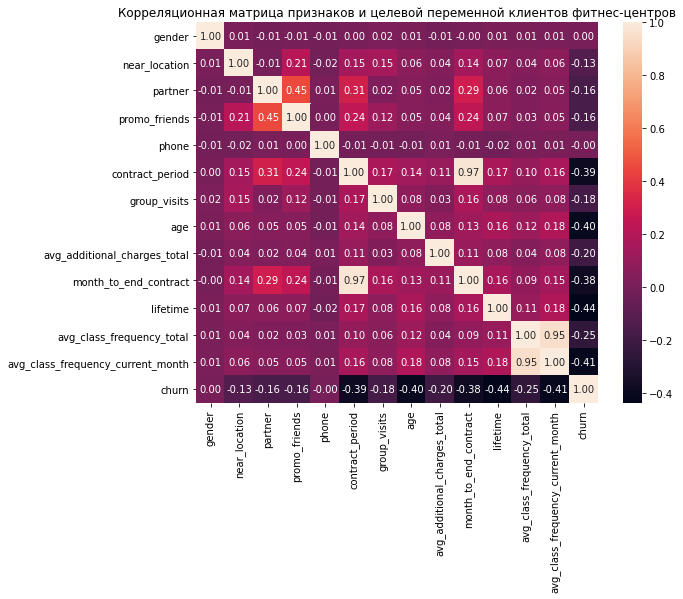

In [37]:
plt.figure(figsize=(9, 7))
plt.title('Корреляционная матрица признаков и целевой переменной клиентов фитнес-центров')
sns.heatmap(data.corr(), annot = True, fmt='.2f')
plt.show()

При анализе данных обратили внимание на следующее:

- Признаки 'gender' и 'Phone' не имеют взаимосвязи не только с целевой переменной, но и с другими признаками.
- Умеренное влияние на целевую переменную оказывают 'age', 'contract_period', 'lifetime' и 'avg_class_frequency_current_month'. Чем старше клиент, чем длительнее абонемент, чем больше времени прошло с момента первого посещения и чем чаще клиент посещал зал в последний месяц, тем ниже вероятность оттока.
- Остальные признаки практически не влияют на целевую переменную.
- Существует сильная линейная связь (0,97) между 'contract_period' и 'month_to_end_contract', что логично, так как абонемент не может заканчиваться позже срока его действия.
- Также наблюдается смысловая и линейная связь (0,95) между 'avg_class_frequency_total' и 'avg_class_frequency_current_month'.

Хотя пары признаков, такие как 'Contract_period' и 'Month_to_end_contract', 'avg_class_frequency_total' и 'avg_class_frequency_current_month', имеют высокую корреляцию, их удаление не требуется перед обучением моделей. Это связано с тем, что используемые алгоритмы обладают встроенной регуляризацией (например, Logistic Regression) или не чувствительны к мультиколлинеарности (например, RandomForestClassifier). В некоторых случаях эти признаки могут даже добавить дополнительный контекст и помочь модели лучше обучиться.

### Промежуточные выводы по шагу 2
После исследования данных удалось выявить, что:
- Доля мужчин и женщин среди ушедших клиентов примерно одинакова. Это свидетельствует о том, что пол не оказывает значительного влияния на решение клиентов об уходе. Следовательно, признак пола не имеет существенного значения для прогнозирования оттока и может быть исключен из рассмотрения при построении моделей.
- Клиенты, проживающие или работающие в районе, где расположен фитнес-центр, составляют примерно 80% от общего числа клиентов. Однако доля ушедших клиентов среди них почти в два раза ниже, чем у остальных. Это указывает на то, что клиенты, проживающие поблизости от центра, более лояльны и стабильны. Следовательно, привлечение таких клиентов может быть эффективной стратегией для уменьшения оттока.
- Количество клиентов, пришедших от компаний-партнёров, и остальных клиентов примерно одинаковое. Однако, доля ушедших среди клиентов от партнёров значительно ниже. Это свидетельствует о том, что сотрудничество с компаниями-партнёрами может быть ключом к более низкой оттока клиентов. Следовательно, стоит активнее привлекать таких клиентов и усиливать сотрудничество с партнёрами для расширения их сети.
- Примерно треть клиентов пришла в рамках акции «приведи друга». Доля ушедших среди таких клиентов в 2 раза ниже, чем доля ушедших среди остальных клиентов. Акция работает: мы собрали не просто клиентов, но ещё и лояльных.
- Клиентов, чьи телефоны у нас есть, почти в 10 раз больше, чем остальных. Однако этот признак не влияет на факт ухода клиента.
- У более чем половины клиентов длительность текущего абонемента составляет всего 1 месяц. Среди таких клиентов доля ушедших наивысшая - 42%. В отличие от этого, клиенты с абонементом на 12 месяцев практически не попадают в отток. Это может говорить о том, что клиенты с долгосрочными абонементами более преданы занятиям в фитнес-центре. Возможно, их привязка к центру обусловлена оплатой за длительный срок, что стимулирует их оставаться. Таким образом, стимулирование продажи "долгосрочных" абонементов может быть эффективной стратегией для снижения оттока.
- Доля клиентов, посещающих групповые занятия, немного меньше, чем участников индивидуальных занятий. Однако доля оттока среди посетителей групповых занятий примерно в два раза ниже. Это может говорить о том, что групповые занятия способствуют повышению лояльности клиентов. Возможно, они чувствуют большую привязанность к клубу и группе единомышленников. Если это действительно так, то активное приглашение клиентов на групповые занятия может помочь удержать и привлечь новых клиентов.
- Клиенты старше 35 лет практически не попадают в категорию оттока. Возможно, стоит уделить больше внимания привлечению и удержанию клиентов старшего возраста.
- Клиенты, покинувшие фитнес-центр, в среднем тратили меньше на дополнительные услуги. Те, кто значительно больше тратил (более 400), остаются с нами.
- Большинство клиентов имеют абонементы, которые скоро истекут, особенно часто это происходит через месяц. Однако отток среди таких клиентов является очень высоким. Для предотвращения оттока стоит предлагать клиентам продление абонемента заранее, возможно, с предоставлением скидки или другими привилегиями.
- Клиенты, которые начали посещать наш центр более 10 месяцев назад, не показывают признаков оттока. Это хороший знак и свидетельствует о стабильности таких клиентов. Также заметно, что вероятность оттока снижается с увеличением продолжительности посещений: особенно резкое снижение заметно после первого месяца. Поэтому важно предоставлять клиентам качественное обслуживание и мотивировать их оставаться в первые месяцы.
- Среди ушедших клиентов средняя частота посещений была немного ниже, чем у тех, кто остался. Клиенты, посещающие фитнес-центр 4 раза и более в неделю, скорее всего, останутся с нами и не уйдут.
- Если ушедшие клиенты в среднем посещали зал 1,5 раза в неделю за весь период действия абонемента, то в последний месяц этот показатель у них снизился до 1 раза в неделю. Уменьшение частоты посещений является предвестником возможного оттока клиента. Рекомендуется рассмотреть возможность предложения клиенту скидки или бесплатного группового занятия.

## Шаг 3. Постройте модель прогнозирования оттока клиентов

Для прогнозирования оттока клиентов мы будем использовать задачу бинарной классификации, где целью является определение, останется ли клиент в фитнес-центре или уйдет через месяц. Для этой цели мы построим две модели: одну на основе логистической регрессии (LogisticRegression), а вторую - на основе алгоритма случайного леса (RandomForestClassifier). Затем мы сравним производительность обеих моделей, чтобы определить, которая лучше справляется с поставленной задачей.

In [38]:
X = data.drop('churn', axis=1)
y = data['churn']

Теперь разобьём данные на обучающую и валидационную выборку в соотношении 80/20%:

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) 

Для использования модели LogisticRegression требуется масштабирование признаков, что означает их стандартизацию до стандартного вида с средним значением 0 и стандартным отклонением 1. Для этого применим метод StandardScaler, который обучим на обучающей выборке признаков, а затем применим к значениям признаков как в обучающей, так и в валидационной выборке.

In [40]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

Давайте создадим функцию, которая принимает в качестве входных данных алгоритм модели для обучения. Затем функция обучает модель на стандартизированных тестовых данных и соответствующих тестовых целевых переменных. После этого она делает прогноз для валидационных стандартизированных данных и возвращает матрицу ошибок модели, а также метрики accuracy, precision и recall.

In [41]:
def my_function (model, model_name):
    model.fit(X_train_st, y_train)
    y_pred = model.predict(X_test_st)
    cm = metrics.confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 4))
    sns.heatmap(cm, annot = True, fmt='.0f')
    plt.title(f'Матрица ошибок модели {model_name}')
    plt.xlabel('Прогноз модели')
    plt.ylabel('Истинное значение')
    plt.show()
    print('Accuracy:', round(metrics.accuracy_score(y_test, y_pred), 3))
    print('Precision:', round(metrics.precision_score(y_test, y_pred), 3))
    print('Recall:', round(metrics.recall_score(y_test, y_pred), 3))

Воспользуемся функцией, обучим и протестируем модель LogisticRegression:

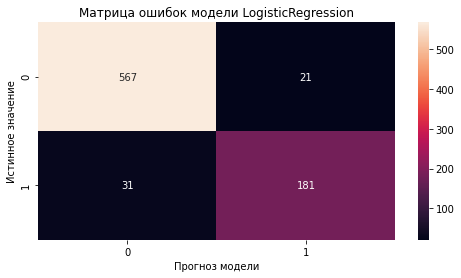

Accuracy: 0.935
Precision: 0.896
Recall: 0.854


In [42]:
my_function(LogisticRegression(random_state=0), 'LogisticRegression')

Модель логистической регрессии правильно классифицировала 567 клиентов, которые остались, и 181 клиента, которые ушли. Однако она допустила ошибки в случае 21 клиента, которые остались, и 31 клиента, которые ушли.

Аналогично поступим и с RandomForestClassifier:

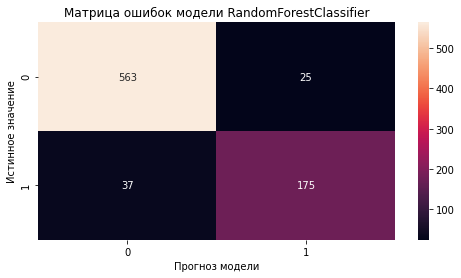

Accuracy: 0.922
Precision: 0.875
Recall: 0.825


In [43]:
my_function(RandomForestClassifier(n_estimators = 100, random_state=0), 'RandomForestClassifier')

Модель случайного леса правильно классифицировала 563 клиентов, которые остались, и 175 клиентов, которые ушли. Однако она допустила ошибки в случае 25 клиентов, которые остались, и 37 клиентов, которые ушли.

Precision немного выше у модели RandomForestClassifier. Используя модель LogisticRegression, мы можем неправильно предложить на одну скидку или специальное предложение больше, чем если бы применяли модель RandomForestClassifier. Однако это не так критично, как потерять клиента.

### Промежуточный вывод по шагу 3
- Модель логистической регрессии правильно классифицировала 567 клиентов, которые остались, и 181 клиента, которые ушли. Однако она допустила ошибки в случае 21 клиента, которые остались, и 31 клиента, которые ушли.
- Модель случайного леса правильно классифицировала 563 клиентов, которые остались, и 175 клиентов, которые ушли. Однако она допустила ошибки в случае 25 клиентов, которые остались, и 37 клиентов, которые ушли.

У модели LogisticRegression выше показатель Recall, что означает, что она лучше определяет действительно ушедших клиентов. Поэтому мы выбираем эту модель в качестве основной для прогнозирования оттока клиентов.

## Шаг 4. Сделайте кластеризацию клиентов

Для оптимизации маркетинговых активностей и выявления ключевых групп клиентов, мы решаем задачу кластеризации. Мы рассмотрим два популярных метода:
1. Агломеративная иерархическая кластеризация: этот метод не требует заранее заданного числа групп (кластеров). Он объединяет близкие объекты в кластеры по мере движения отдельных точек данных отдельно к более крупным кластерам.
2. K-Means: этот метод требует заранее заданное число кластеров. Он разбивает набор данных на заданное количество кластеров, минимизируя сумму квадратов расстояний между точками данных и центроидами кластеров.

Мы применим оба алгоритма для выделения наиболее ярких групп клиентов, определим их характеристики и разработаем стратегии маркетинга на основе полученных результатов.

Для начала применим агломеративную иерархическую кластеризацию. Мы позволим модели самой определить количество кластеров и разделить клиентов на основе их характеристик.

Мы импортируем модель, предоставляемую библиотекой, и передадим ей стандартизированные признаки клиентов. Затем мы визуализируем получившиеся связи между клиентами в виде дендрограммы.

In [44]:
X_st = scaler.fit_transform(X)
linked = linkage(X_st, method = 'ward') 

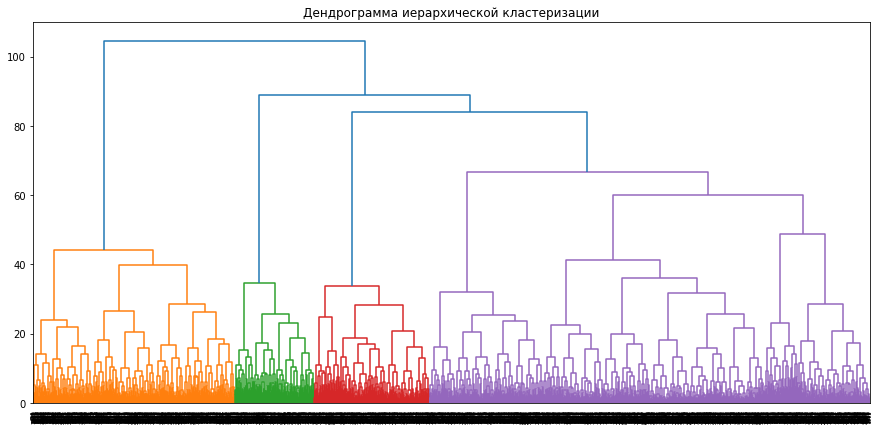

In [45]:
plt.figure(figsize=(15, 7))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма иерархической кластеризации')
plt.show() 

По результатам анализа дендрограммы, которая отображает иерархическую структуру между клиентами, предложено оптимальное число кластеров - 4. Однако можно также рассмотреть разбиение на 5 кластеров. Далее будем использовать алгоритм K-Means для разделения клиентов на указанное количество кластеров.

Воспользуемся алгоритмом K-Means и разделим клиентов на заранее определённое число кластеров - 5. Создадим модель и применим её к стандартизированным признакам:

In [46]:
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(X_st)

In [47]:
# Проверим количество кластеров и их названия:
set(labels)

{0, 1, 2, 3, 4}

Добавим значения кластеров в таблицу data_filtered в столбец 'label':

In [48]:
data['label'] = labels
data.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,label
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0,1
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0,0
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0,0
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0,3


Теперь у каждого клиента есть дополнительный признак - номер кластера, к которому он относится.

Давайте проведем анализ кластеров, сформированных с помощью алгоритма K-Means. Мы постараемся выявить особенности клиентов в каждом кластере, понять, по каким признакам алгоритм разделил клиентов, и предложим рекомендации по работе с клиентами из каждого кластера.

Сгруппируем клиентов по кластерам и выведем средние значения признаков:

In [49]:
data_grouped = data.groupby('label').mean().reset_index()
data_grouped

,label,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


Для оценки различий признаков в кластерах удобно использовать визуализацию. Для этого напишем функцию, которая будет строить столбиковую диаграмму, отображающую средние значения признака в зависимости от кластера. Эта функция более простая по сравнению с предыдущей, так как требует только одного параметра - признака.

In [50]:
def cluster_barplot(feature):
    data_grouped.plot(x='label', y=feature, kind='bar', figsize=(8, 3), alpha=.7, legend=True)
    plt.title(f"Среднее значение признака '{feature}' в кластерах")
    plt.xlabel('Кластер')
    plt.ylabel('Значение признака') 
    plt.show()

Воспользуемся функцией и сначала оценим, выявил ли алгоритм K-Means кластеры, клиенты в которых уходят, и кластеры, в которых остаются:

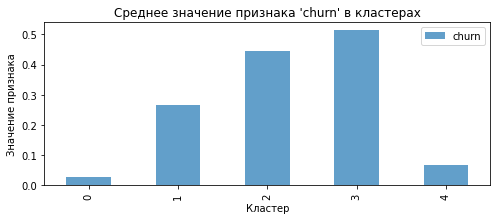

In [51]:
cluster_barplot('churn')

Не имея доступа к значениям целевой переменной, алгоритм K-Means смог выделить кластеры '0' и '4', в которых клиенты почти не уходят от нас. А с клиентами в других кластерах ('1', '2' и '3') нам нужно лучше работать.

Изучим распределение категориальных признаков по кластерам:

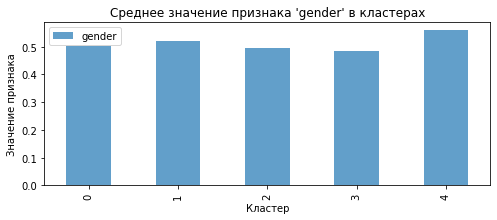

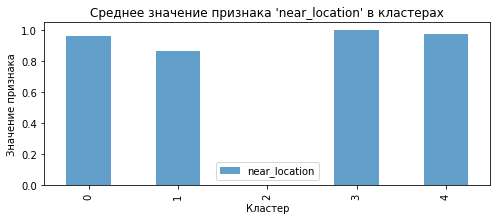

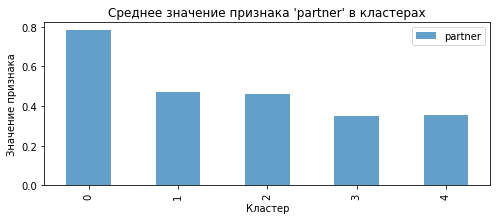

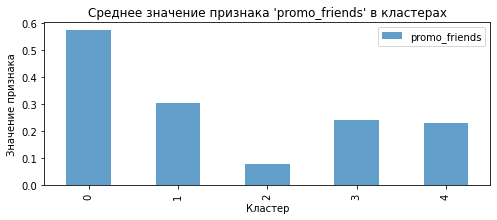

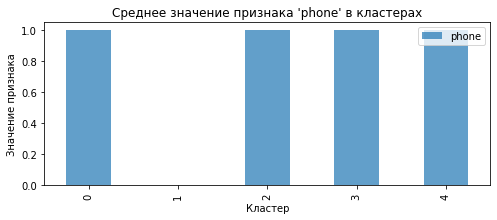

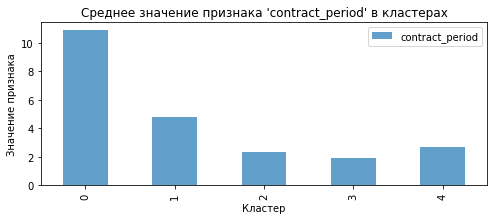

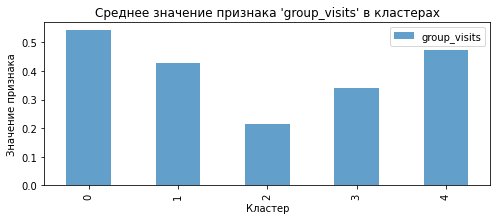

In [52]:
for feature in cat_prizn:
    cluster_barplot(feature)

Теперь изучим распределение количественных признаков по кластерам. Также напишем специальную функцию построения диаграмм размаха, котора принимает на вход признак и возвращает его распределение по кластерам:

In [53]:
def cluster_boxplot(feature):
    plt.figure(figsize=(8, 3))
    plt.boxplot([data.query('label == 0')[feature], data.query('label == 1')[feature]
            , data.query('label == 2')[feature], data.query('label == 3')[feature]
            , data.query('label == 4')[feature]])
    plt.title(f"Распределение клиентов в кластерах в зависимости \n от признака '{feature}'")
    plt.xlabel('Кластер')
    plt.ylabel('Значение признака') 
    plt.xticks([1, 2, 3, 4, 5], [0, 1, 2, 3, 4])
    plt.show()

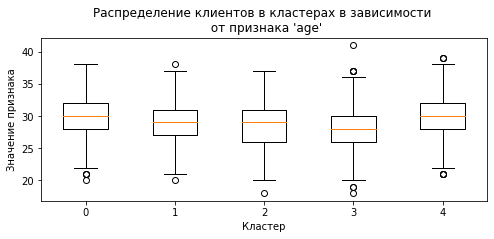

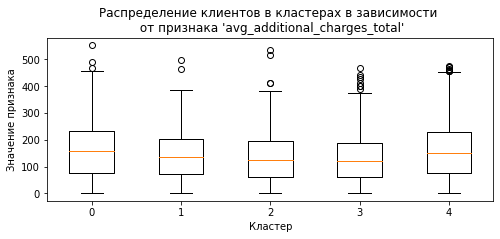

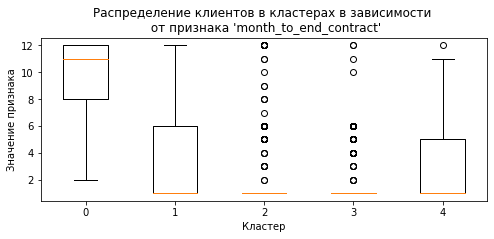

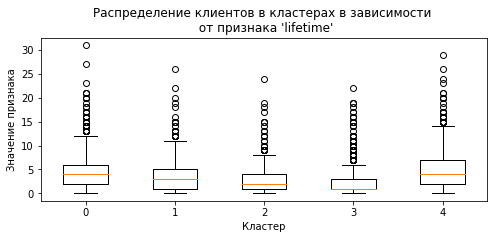

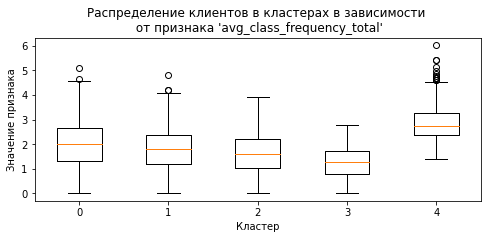

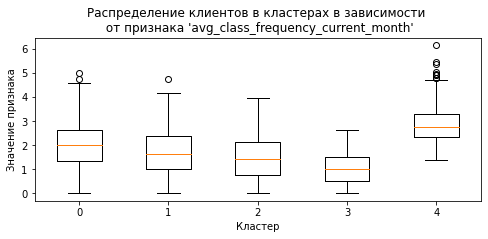

In [54]:
for feature in num_prizn:
    cluster_boxplot(feature)

### Промежуточные выводы по шагу 4

После изучения графиков можно выделить такие особенности клиентов в кластере '0':

- подавляющее большинство клиентов имеют контракт на год вперед;
- примерно 50% посещают групповые занятия
- клиенты живут или работают поблизости с фитнес-центром;
- значительная доля (около 70%) клиентов пришли от компаний-партнёров;
- 40% были привлечены через друзей и знакомых;
- длинные абонементы - в среднем на 12 месяцев;
- посещают зал в среднем два раза в неделю за последний месяц

Группа клиентов привлеченных за счет компаний-партенров и друзей, приобретающих длинные абонименты на год вперед, активнее всех посещают групповые занятия

После изучения графиков можно выделить такие особенности клиентов в кластере '1':

- примерно 50% клиентов уйдут через месяц;
- клиенты живут или работают поблизости с фитнес-центром;
- высокая доля (около 40%) клиентов, которые пришли от компаний-партнёров;
- 30% пришли через друзей и знакомых;
- среднесрочные абонементы - в среднем на 4 месяца;
- посещают зал в среднем два раза в неделю.

Группа клиентов характеризующаяся тем что не оставляют мобильных номеров и приобретают среднесрочные абонименты

После изучения графиков можно выделить такие особенности клиентов в кластере '2':

- подавляющее большинство клиентов уйдут через месяц;
- клиенты живут или работают не рядом с фитнес-центром;
- значительная доля (около 45%) клиентов пришли от компаний-партнёров;
- 10% были привлечены через друзей и знакомых;
- короткие абонементы - в среднем на 2 месяца;
- посещают зал в среднем один раз в неделю за последний месяц
- порядка 20% посещают групповые занятия

Группа клиентов близких во многом идентичных 3, с той лишь разницей что не живут рядом с фитнес-центром и реже посещают групповые занятия

После изучения графиков можно выделить такие особенности клиентов в кластере '3':

- подавляющее большинство клиентов уйдут через месяц;
- клиенты живут или работают поблизости с фитнес-центром;
- малая доля (около 40%) клиентов пришли от компаний-партнёров;
- 10% были привлечены через друзей и знакомых;
- короткие абонементы - в среднем на 2 месяца;
- посещают зал в среднем один раз в неделю за последний месяц

Группа клиентов близких к кластеру 2, средним лайфтаймом в месяц и имеют самый высокий отвал

После изучения графиков можно выделить такие особенности клиентов в кластере '4':

- примерно 50% клиентов уйдут через месяц;
- клиенты живут или работают поблизости с фитнес-центром;
- малая доля (около 40%) клиентов пришли от компаний-партнёров;
- 20% были привлечены через друзей и знакомых;
- короткие абонементы - в среднем на 3 месяца;
- посещают зал в среднем три раза в неделю

Группа клиентов идентичных по активности группе 1, с той лишь разницей что чаще посещают фитнес-центр

Не имея доступа к значениям целевой переменной, алгоритм K-Means смог выделить кластеры '0' и '4', в которых клиенты почти не уходят от нас. А с клиентами в других кластерах ('1', '2' и '3') нам нужно лучше работать.

## Общие выводы
Предметом исследования была сеть фитнес-центров "Культурист датасаентист". Данная сеть разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Целью данного проекта является анализ анкет клиентов и разработка стратегии взаимодействия с ними на основе аналитических данных с целью уменьшения оттока. «Культурист-датасаентист» предоставил сведения в csv-файлах - gym_churn.csv, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. О качестве данных не было никакой информации. Поэтому прежде чем приступить к анализу, понадобился обзор данных, чтобы полученные в конечном итоге результаты были достоверны

После изучения данных, было выявлено:
- Данные предоставлены о 4000 клиентов сети фитнес-центра
- Данные исследованы на пропуски и дубликаты. Их выявить не удалось
- После ознакомления с колонкой month_to_end_contract было принято решение привести колонку к типу int
- Для удобства использования все названия колонок приведены к нижнему регистру
- После ознакомления со статистическими характеристиками данных был получен портрет среднестатистического клиента центра:
 - Возраст - 29 лет
 - Проживает или работает поблизости от центра
 - Оставил свой контактный номер телефона
 - Посещает фитнес-центр уже 4 месяца
 - В среднем посещает центр 2 раза в неделю
 - Потратил 147 денежных единиц на дополнительные услуги
 - Имеет действующий абонемент на 5 месяцев, при этом осталось 4 месяца до его окончания
 - Скорее всего пришёл без использования акции "приведи друга"

После того как данные были изучены, приступила к исследованию данных и удалось выявить следующее:
- Доля мужчин и женщин среди ушедших клиентов примерно одинакова. Это свидетельствует о том, что пол не оказывает значительного влияния на решение клиентов об уходе. Следовательно, признак пола не имеет существенного значения для прогнозирования оттока и может быть исключен из рассмотрения при построении моделей.
- Клиенты, проживающие или работающие в районе, где расположен фитнес-центр, составляют примерно 80% от общего числа клиентов. Однако доля ушедших клиентов среди них почти в два раза ниже, чем у остальных. Это указывает на то, что клиенты, проживающие поблизости от центра, более лояльны и стабильны. Следовательно, привлечение таких клиентов может быть эффективной стратегией для уменьшения оттока.
- Количество клиентов, пришедших от компаний-партнёров, и остальных клиентов примерно одинаковое. Однако, доля ушедших среди клиентов от партнёров значительно ниже. Это свидетельствует о том, что сотрудничество с компаниями-партнёрами может быть ключом к более низкой оттока клиентов. Следовательно, стоит активнее привлекать таких клиентов и усиливать сотрудничество с партнёрами для расширения их сети.
- Примерно треть клиентов пришла в рамках акции «приведи друга». Доля ушедших среди таких клиентов в 2 раза ниже, чем доля ушедших среди остальных клиентов. Акция работает: мы собрали не просто клиентов, но ещё и лояльных.
- Клиентов, чьи телефоны у нас есть, почти в 10 раз больше, чем остальных. Однако этот признак не влияет на факт ухода клиента.
- У более чем половины клиентов длительность текущего абонемента составляет всего 1 месяц. Среди таких клиентов доля ушедших наивысшая - 42%. В отличие от этого, клиенты с абонементом на 12 месяцев практически не попадают в отток. Это может говорить о том, что клиенты с долгосрочными абонементами более преданы занятиям в фитнес-центре. Возможно, их привязка к центру обусловлена оплатой за длительный срок, что стимулирует их оставаться. Таким образом, стимулирование продажи "долгосрочных" абонементов может быть эффективной стратегией для снижения оттока.
- Доля клиентов, посещающих групповые занятия, немного меньше, чем участников индивидуальных занятий. Однако доля оттока среди посетителей групповых занятий примерно в два раза ниже. Это может говорить о том, что групповые занятия способствуют повышению лояльности клиентов. Возможно, они чувствуют большую привязанность к клубу и группе единомышленников. Если это действительно так, то активное приглашение клиентов на групповые занятия может помочь удержать и привлечь новых клиентов.
- Клиенты старше 35 лет практически не попадают в категорию оттока. Возможно, стоит уделить больше внимания привлечению и удержанию клиентов старшего возраста.
- Клиенты, покинувшие фитнес-центр, в среднем тратили меньше на дополнительные услуги. Те, кто значительно больше тратил (более 400), остаются с нами.
- Большинство клиентов имеют абонементы, которые скоро истекут, особенно часто это происходит через месяц. Однако отток среди таких клиентов является очень высоким. Для предотвращения оттока стоит предлагать клиентам продление абонемента заранее, возможно, с предоставлением скидки или другими привилегиями.
- Клиенты, которые начали посещать наш центр более 10 месяцев назад, не показывают признаков оттока. Это хороший знак и свидетельствует о стабильности таких клиентов. Также заметно, что вероятность оттока снижается с увеличением продолжительности посещений: особенно резкое снижение заметно после первого месяца. Поэтому важно предоставлять клиентам качественное обслуживание и мотивировать их оставаться в первые месяцы.
- Среди ушедших клиентов средняя частота посещений была немного ниже, чем у тех, кто остался. Клиенты, посещающие фитнес-центр 4 раза и более в неделю, скорее всего, останутся с нами и не уйдут.
- Если ушедшие клиенты в среднем посещали зал 1,5 раза в неделю за весь период действия абонемента, то в последний месяц этот показатель у них снизился до 1 раза в неделю. Уменьшение частоты посещений является предвестником возможного оттока клиента. Рекомендуется рассмотреть возможность предложения клиенту скидки или бесплатного группового занятия.

Исследование признаков 4000 клиентов, позволило построить модель прогнозирования оттока клиентов, выявляющую 85%, которые уйдут через месяц (Recall = 0,854). В будущем, делая ежемесячный срез признаков клиентов, мы будем понимать, каким клиентам предложить специальные условия и "плюшки", чтобы не потерять их

Ещё одна задача, которую необходимо было решить - выделить несколько наиболее ярких групп клиентов, определить их особенности и оптимизировать маркетинговые активности. Для этого были использованы методы кластеризации. В ходе использования методов кластеризации было выявлено 5 кластеров, исследовав которые было выявлено, что:
В кластере '0':
- подавляющее большинство клиентов имеют контракт на год вперед;
- примерно 50% посещают групповые занятия
- клиенты живут или работают поблизости с фитнес-центром;
- значительная доля (около 70%) клиентов пришли от компаний-партнёров;
- 40% были привлечены через друзей и знакомых;
- длинные абонементы - в среднем на 12 месяцев;
- посещают зал в среднем два раза в неделю за последний месяц

В кластере '1':
- примерно 50% клиентов уйдут через месяц;
- клиенты живут или работают поблизости с фитнес-центром;
- высокая доля (около 40%) клиентов, которые пришли от компаний-партнёров;
- 30% пришли через друзей и знакомых;
- среднесрочные абонементы - в среднем на 4 месяца;
- посещают зал в среднем два раза в неделю.

Группа клиентов характеризующаяся тем что не оставляют мобильных номеров и приобретают среднесрочные абонименты

В кластере '2':
- подавляющее большинство клиентов уйдут через месяц;
- клиенты живут или работают не рядом с фитнес-центром;
- значительная доля (около 45%) клиентов пришли от компаний-партнёров;
- 10% были привлечены через друзей и знакомых;
- короткие абонементы - в среднем на 2 месяца;
- посещают зал в среднем один раз в неделю за последний месяц
- порядка 20% посещают групповые занятия

Группа клиентов близких во многом идентичных 3, с той лишь разницей что не живут рядом с фитнес-центром и реже посещают групповые занятия

В кластере '3':
- подавляющее большинство клиентов уйдут через месяц;
- клиенты живут или работают поблизости с фитнес-центром;
- малая доля (около 40%) клиентов пришли от компаний-партнёров;
- 10% были привлечены через друзей и знакомых;
- короткие абонементы - в среднем на 2 месяца;
- посещают зал в среднем один раз в неделю за последний месяц

Группа клиентов близких к кластеру 2, средним лайфтаймом в месяц и имеют самый высокий отвал

В кластере '4':
- примерно 50% клиентов уйдут через месяц;
- клиенты живут или работают поблизости с фитнес-центром;
- малая доля (около 40%) клиентов пришли от компаний-партнёров;
- 20% были привлечены через друзей и знакомых;
- короткие абонементы - в среднем на 3 месяца;
- посещают зал в среднем три раза в неделю

Группа клиентов идентичных по активности группе 1, с той лишь разницей что чаще посещают фитнес-центр

Не имея доступа к значениям целевой переменной, алгоритм K-Means смог выделить кластеры '0' и '4', в которых клиенты почти не уходят от нас. А с клиентами в других кластерах ('1', '2' и '3') нам нужно лучше работать.

Исходя из полученных кластеров можно дать следующие рекомендации для маркетинговых и акционных мероприятий:
1. Клиенты, редко посещающих фитнес-центр. Для таких клиентов важно увеличить мотивацию к тренировкам. Мы можем предложить следующие акции:
- "Каждую вторую тренировку в неделю - бесплатный протеиновый коктейль";
- "Бонусные баллы за каждую тренировку, которые можно обменять на скидки на дополнительные услуги".
2. Для клиентов с краткосрочными абонементами или абонементами, которые скоро заканчиваются: Такие клиенты нуждаются в переводе на долгосрочные абонементы. Мы можем предложить следующие акции:
- "Специальная скидка при переходе на абонемент на 6 или 12 месяцев" - чуть дешевле, чем обычная стоимость таких абонементов;
- "Пакет из 10 тренировок с персональным инструктором при переходе на абонемент на 6 или 12 месяцев";
- "Скидка 15% на дополнительные услуги при переходе на абонемент на 6 или 12 месяцев".
3. Для клиентов, проживающих или работающих далеко от фитнес-центра: Для уменьшения дискомфорта от долгих поездок до фитнес-центра мы можем предложить следующие акции:
- "Бесплатное парковочное место на 3 часа во время тренировки" - удобно для клиентов, приезжающих на машине;
- "Особые условия в рамках акции "приведи друга" - посещение тренировок вместе с другом поможет скрасить время в дороге".